# customer segmentation using k means clustering

In [21]:
#importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [10]:
#load the dataset
customer_data=pd.read_csv('/content/13_customer_segmentation.csv')


# inspecting 5 rows of data

In [11]:
customer_data.head()

,customer_id,age,income,spending_score,visits_per_month
0,CUST1000,56,120186,55,9
1,CUST1001,69,49674,80,1
2,CUST1002,46,61271,62,8
3,CUST1003,32,88688,30,6
4,CUST1004,60,126076,55,6


In [7]:
print(customer_data.shape)

(541909, 8)


#getting some information


In [13]:
#getting information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       1000 non-null   object
 1   age               1000 non-null   int64 
 2   income            1000 non-null   int64 
 3   spending_score    1000 non-null   int64 
 4   visits_per_month  1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


checking for missing values

In [12]:
#checking for missing values
print(customer_data.isnull().sum())

customer_id         0
age                 0
income              0
spending_score      0
visits_per_month    0
dtype: int64


**choosing annual income and spending score**

In [45]:
# choosing the annual income columns and spending score columns
x=customer_data.iloc[:,[2,3]].values

In [46]:
#choosing the number of clusters
#wcss (within cluster sum of square)
#find the wcss value for different number of clusaters

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

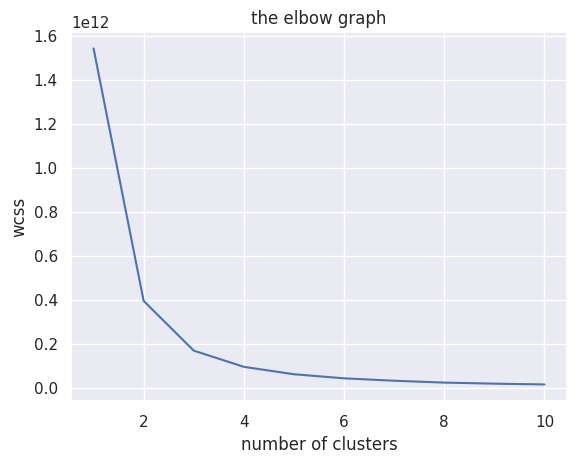

In [26]:
#plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('the elbow graph')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [47]:
#training the k-means clusatering model
k_means=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_means=k_means.fit_predict(x)
y_means

array([4, 3, 3, 0, 2, 1, 3, 4, 3, 1, 4, 2, 4, 4, 1, 0, 2, 2, 1, 1, 1, 0,
       0, 1, 0, 4, 3, 2, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 2,
       3, 2, 2, 2, 2, 1, 3, 1, 1, 0, 3, 4, 4, 3, 0, 4, 2, 0, 4, 0, 3, 1,
       1, 1, 3, 4, 3, 1, 2, 0, 0, 4, 2, 3, 2, 1, 1, 2, 4, 4, 0, 4, 3, 4,
       0, 1, 1, 3, 2, 0, 4, 0, 0, 2, 3, 4, 1, 0, 2, 4, 4, 1, 2, 2, 1, 1,
       3, 3, 0, 4, 0, 1, 2, 4, 1, 0, 3, 3, 4, 0, 1, 0, 2, 0, 1, 0, 1, 2,
       4, 3, 1, 4, 0, 3, 0, 3, 1, 4, 0, 1, 0, 3, 4, 3, 2, 0, 2, 0, 3, 2,
       1, 0, 2, 1, 0, 4, 2, 1, 0, 2, 2, 0, 0, 2, 1, 0, 3, 2, 2, 0, 4, 2,
       0, 2, 4, 1, 4, 1, 3, 0, 3, 4, 1, 3, 1, 4, 3, 2, 3, 0, 1, 2, 2, 2,
       1, 4, 2, 0, 3, 3, 3, 4, 1, 3, 0, 1, 2, 1, 3, 3, 3, 2, 0, 1, 3, 2,
       4, 1, 1, 4, 0, 3, 1, 3, 4, 0, 1, 4, 2, 1, 4, 1, 2, 0, 4, 0, 4, 0,
       3, 2, 3, 1, 1, 3, 2, 0, 3, 2, 1, 3, 3, 0, 4, 2, 0, 2, 2, 4, 1, 2,
       4, 2, 3, 0, 0, 0, 0, 3, 4, 4, 0, 0, 3, 4, 2, 0, 1, 2, 3, 2, 2, 4,
       0, 3, 1, 1, 1, 1, 2, 1, 4, 4, 4, 4, 2, 1, 2,

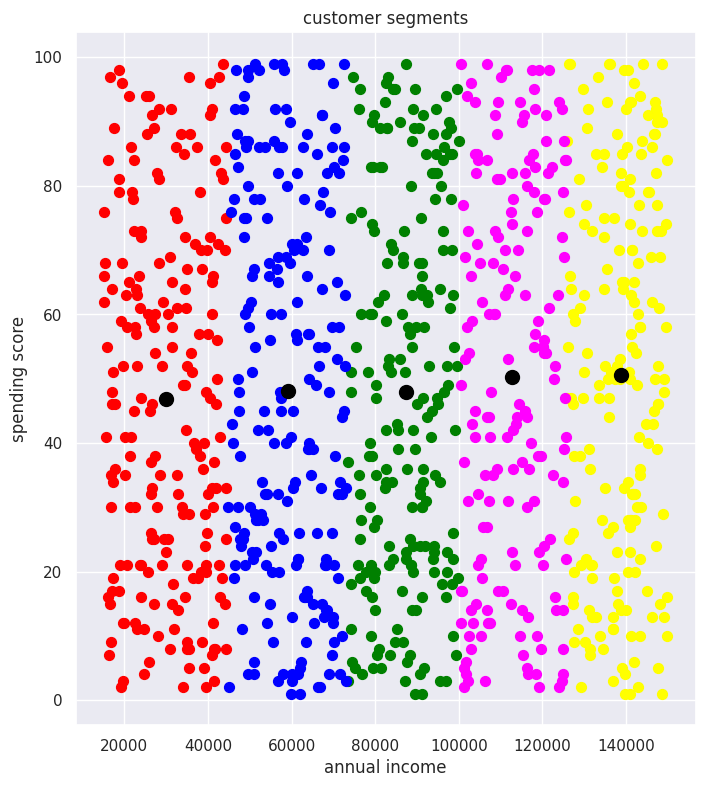

In [50]:
#visualizing all the clusters
#plotting all the clusters and their centroids
plt.figure(figsize=(8,9))
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c='green',label='cluster1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c='red',label='cluster2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=50,c='yellow',label='cluster3')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=50,c='blue',label='cluster4')
plt.scatter(x[y_means==4,0],x[y_means==4,1],s=50,c='magenta',label='cluster5')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c='black',label='centroid')
plt.title('customer segments')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()